In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
len(X_train)

60000

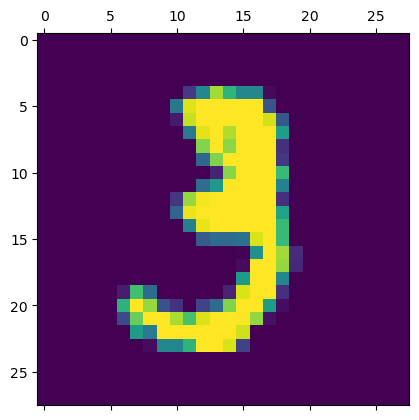

In [34]:
plt.matshow(X_train[10])

#### Scaling the Data 

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train[0].shape

(28, 28)

In [37]:
len(X_train)

60000

#### Flattening the Layers

In [38]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened  = X_test.reshape(len(X_test), 28*28)

In [39]:
X_train_flattened[0].shape

(784,)

In [40]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Creating a Neural Network

In [41]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid') 
    # 10 digits (Multiclass classification) so here units - 10
])

model.compile(
    optimizer='adagrad',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

c:\Users\yoges\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.4835 - loss: 1.8104
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.7796 - loss: 1.1044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8077 - loss: 0.9175
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.8261 - loss: 0.8138
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8390 - loss: 0.7454


In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8242 - loss: 0.7642


[0.6914990544319153, 0.8507999777793884]

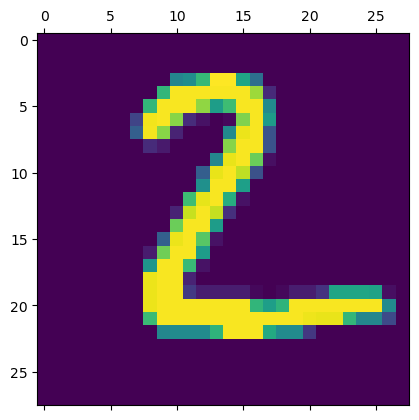

In [44]:
plt.matshow(X_test[1])

In [45]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


In [46]:
np.argmax(y_predicted[3])

0